In [1]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from matplotlib.ticker import PercentFormatter
import numpy as np
import json
import sys
from matplotlib import rcParams
import subprocess as proc
import os
import shutil
import IPython.display as aud
import glob as g

#analyse de la trancription par paty 
#extraction des informations du fichier json de transcription par paty

In [2]:
#parameters
#exemple avec Cepagesresistants_asr_reco.json

transcripName = "Cepagesresistants_asr_reco.json"
audioName = "Cepages_resistants"

seuil = 0.5
extrait_range = 2 #en seconde

In [3]:
dossT = "patyTranscription/"
dossA = "audios\\" + audioName

nomfichier = dossT + transcripName
nomaudio = dossA + "\\" + audioName +".wav"
print("nom aud: " + nomaudio)

with open(nomfichier) as json_data:
    data_dict = json.load(json_data)
confidenceMoy = data_dict["confidence-score"]
words = data_dict["speakers"]
confSpk = []
nomspk = []
data = [] #stock les data
for i in range(0, len(words)):
    spk = words[i]["speaker_id"]
    if spk not in nomspk:
        nomspk.append(spk)
        confSpk.append([])
    for j in range(len(words[i]["words"])):
        words[i]["words"][j]["speaker"] = words[i]["speaker_id"]
        data.append(words[i]["words"][j])
        #temp.append(words[i]["words"][j]["conf"])
#print(confSpk)
#confSpk[1].append([10, 20])
#confSpk[1].append([10, 20])
#print(confSpk)
for i in range(0, len(words)):
    spk = words[i]["speaker_id"]
    for j in range(len(words[i]["words"])):
        confSpk[int(spk[-1]) - 1].append(words[i]["words"][j]["conf"])



nom aud: audios\Cepages_resistants\Cepages_resistants.wav


In [4]:
#mettre en ordre chronologique croissant par key "start" 
sortedtime = sorted(data, key=lambda d: d['start'])
listConf = []

listWord = []
listTime = []
abscisse = []
listT = []
for i in range(len(sortedtime)):
    listConf.append(sortedtime[i]["conf"])
    listWord.append(sortedtime[i]["word"])
    listTime.append( (sortedtime[i]["start"], sortedtime[i]["end"]) )
    listT.append(sortedtime[i]["start"])
    abscisse.append( str(listTime[i][0]) + "\n" + sortedtime[i]["speaker"] + ": " + str(listWord[i] ) )
    #print(abscisse[i])
    #print("\n")
#print(listConf)
#print(listWord)
#print(listTime)
npConf = np.array(listConf)
npWord = np.array(listWord)
npAbscisse = np.array(abscisse)
npTime = np.array(listTime)
npT = np.array(listT)
nbSpk = len(confSpk)


In [5]:
print("nb word : " + str(len(npWord)))
print("nb spk : " + str(nbSpk))

nb word : 294
nb spk : 8


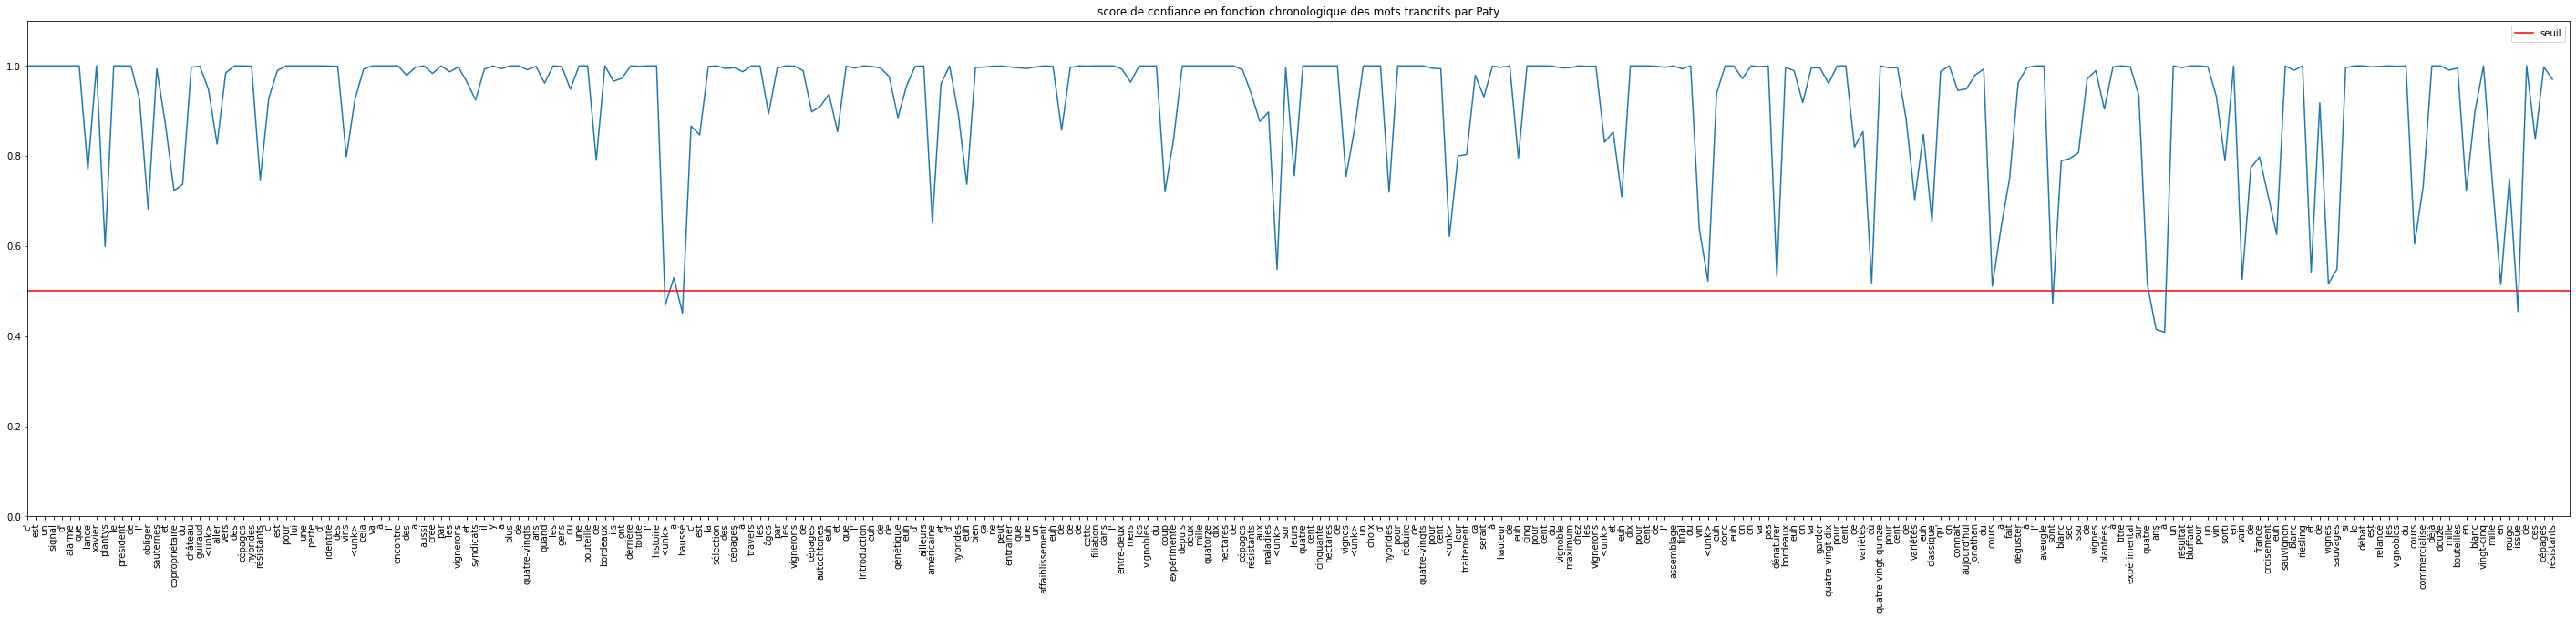

In [8]:
dimx = len(npConf) * 0.17
dimy = 10
plt.figure(figsize=(dimx, dimy))

plt.title("score de confiance en fonction chronologique des mots trancrits par Paty")
plt.plot(npConf)
plt.ylim(0,1.1)
plt.xlim(1,len(npConf)+1)
plt.xticks(range(len(npWord)), npWord, rotation = 90)
plt.axhline(y=seuil, xmin=0, xmax=1, color = "red", label ="seuil")
plt.legend()
#plt.annotate('seuil', xy = (0, seuil), xytext = (0, seuil))
plt.show()


In [7]:
#display the entire audio. It helps to following the graph above along.
aud.display(aud.Audio(data = nomaudio, autoplay = False))

In [9]:
#display little audio extrait of speech under the threshold

#get all the word under seuil conf
oddwords = []
timers = [] #couple of time to get the timer extrait of oddword
oddspeakers = []
for element in sortedtime:
    if element["conf"] < seuil or element["word"] == "<unk>":
        oddwords.append("unk") if element["word"] == "<unk>" else oddwords.append(element["word"])
        start = round(element["start"] - extrait_range, 1) if element["start"] - extrait_range > 0 else 0
        end = round(element["end"] + extrait_range, 1)
        #add 2s of duration at debut and fin
        timers.append((start, end))
        oddspeakers.append( element["speaker"])

In [10]:
#create all oddaudio
oddw_folder = "odd_words"
if not(os.path.exists(oddw_folder)):
    os.mkdir("./" + oddw_folder)
tempdest = "odd_words_" + audioName
tempdir = oddw_folder + "/" + tempdest
if (os.path.exists(tempdir)):
    shutil.rmtree(tempdir) #remove in order to clean before
os.mkdir(tempdir)
#create temp file for each audio 
#name struct : [start]_oddword_[end]speaker.mp3
print("running...")
for index, (start, end)  in enumerate(timers):
    name = oddw_folder + "/" + tempdest + "/" + "[" + str(start) + "]" + oddwords[index] + "[" + str(end) + "]" + oddspeakers[index] + ".wav"
    print(name)
    length = round(end - start,1)
    cmd = "ffmpeg -ss " + str(start) + " -t " + str(length) + " -i " +  "\"" + nomaudio + "\"" + " \"" + name + "\""
    print(cmd)
    proc.run(cmd, shell = True)

running...
odd_words/odd_words_Cepages_resistants/[4.5]unk[8.9]spk1.wav
ffmpeg -ss 4.5 -t 4.4 -i "audios\Cepages_resistants\Cepages_resistants.wav" "odd_words/odd_words_Cepages_resistants/[4.5]unk[8.9]spk1.wav"
odd_words/odd_words_Cepages_resistants/[9.6]unk[13.9]spk1.wav
ffmpeg -ss 9.6 -t 4.3 -i "audios\Cepages_resistants\Cepages_resistants.wav" "odd_words/odd_words_Cepages_resistants/[9.6]unk[13.9]spk1.wav"
odd_words/odd_words_Cepages_resistants/[19.5]unk[24.0]spk3.wav
ffmpeg -ss 19.5 -t 4.5 -i "audios\Cepages_resistants\Cepages_resistants.wav" "odd_words/odd_words_Cepages_resistants/[19.5]unk[24.0]spk3.wav"
odd_words/odd_words_Cepages_resistants/[20.4]haussé[24.8]spk3.wav
ffmpeg -ss 20.4 -t 4.4 -i "audios\Cepages_resistants\Cepages_resistants.wav" "odd_words/odd_words_Cepages_resistants/[20.4]haussé[24.8]spk3.wav"
odd_words/odd_words_Cepages_resistants/[48.6]unk[52.8]spk1.wav
ffmpeg -ss 48.6 -t 4.2 -i "audios\Cepages_resistants\Cepages_resistants.wav" "odd_words/odd_words_Cepages_re

In [11]:
#display of oddaudios
#all .wav files in tempdir
oddaudios = g.glob(tempdir +"/*.wav")

#displaying each audio
for oddword in oddaudios:
    print(oddword)
    aud.display(aud.Audio(data = oddword, autoplay = False))

odd_words/odd_words_Cepages_resistants\[101.3]issue[105.7]spk1.wav


odd_words/odd_words_Cepages_resistants\[19.5]unk[24.0]spk3.wav


odd_words/odd_words_Cepages_resistants\[20.4]haussé[24.8]spk3.wav


odd_words/odd_words_Cepages_resistants\[4.5]unk[8.9]spk1.wav


odd_words/odd_words_Cepages_resistants\[48.6]unk[52.8]spk1.wav


odd_words/odd_words_Cepages_resistants\[50.9]unk[55.2]spk1.wav


odd_words/odd_words_Cepages_resistants\[54.0]unk[58.2]spk1.wav


odd_words/odd_words_Cepages_resistants\[61.3]unk[65.7]spk6.wav


odd_words/odd_words_Cepages_resistants\[64.6]unk[69.1]spk6.wav


odd_words/odd_words_Cepages_resistants\[80.1]sont[84.3]spk1.wav


odd_words/odd_words_Cepages_resistants\[87.7]ans[91.8]spk7.wav


odd_words/odd_words_Cepages_resistants\[87.8]à[91.9]spk7.wav


odd_words/odd_words_Cepages_resistants\[9.6]unk[13.9]spk1.wav


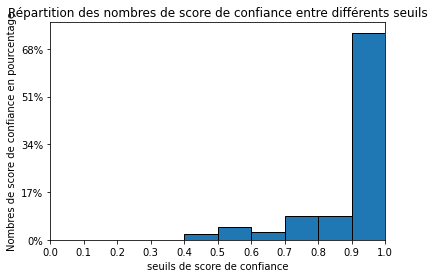

In [12]:
#affichage histogramme (nb de score en tranche seuil de 0.1)
#plt.figure(figsize=(nbSpk * 2, dimy / 2 ))
plt.hist(npConf, range= (0, 1), bins = 10, edgecolor = 'black')
plt.title("Répartition des nombres de score de confiance entre différents seuils")
histox = 15
histoy = 10
plt.xlim(0,1)
abx = np.arange(0, 1.1, 0.1)
plt.gca().yaxis.set_major_formatter(PercentFormatter(len(npConf)))
plt.xticks(abx)
plt.xlabel("seuils de score de confiance")
plt.ylabel("Nombres de score de confiance en pourcentage")
plt.show()

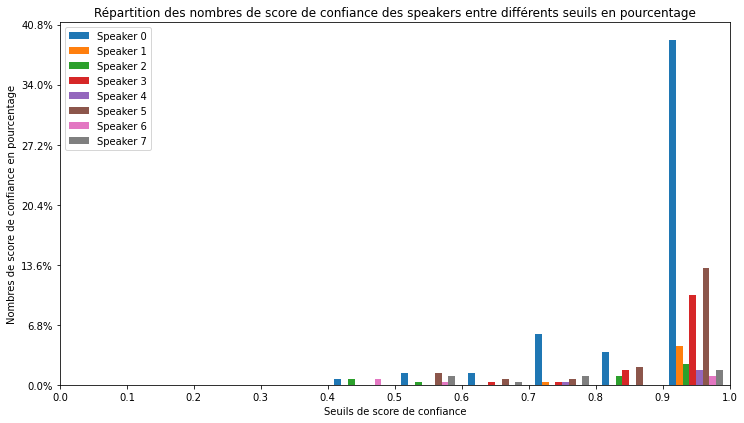

In [13]:
#Répartition du nombre de score de confiance des mots dans différent intervalle de chaque speaker

plt.figure(figsize=(nbSpk * 1.5, dimy / 1.5 ))

plt.hist(confSpk, range = (0, 1), label = ["Speaker " + str(i) for i in range(nbSpk)])
plt.legend(loc='upper left')
plt.title("Répartition des nombres de score de confiance des speakers entre différents seuils en pourcentage")
plt.xlim(0,1)
abx = np.arange(0, 1.1, 0.1)
plt.gca().yaxis.set_major_formatter(PercentFormatter(len(npConf)))
plt.xticks(abx)
#plt.ylim(bottom = 0,top = 100)
plt.ylabel("Nombres de score de confiance en pourcentage")
plt.xlabel("Seuils de score de confiance")
plt.show()

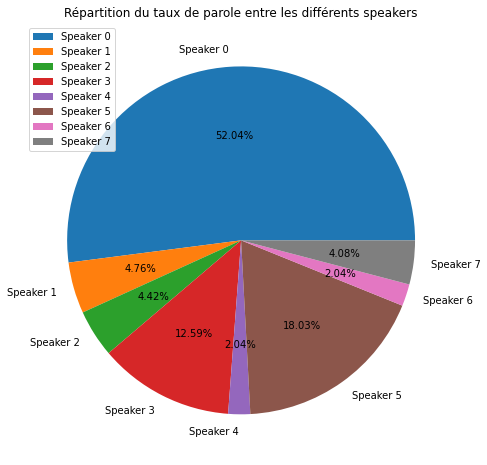

In [14]:
#taux de parole (nombre de mot dit) de chaque speaker
#tabword_speaker = [nb_word_spk0, nb_word_spk1, ...]
tabword_speaker = [len(confSpk[i]) for i in range(nbSpk)]

plt.figure(figsize = (8, 8))
plt.pie(tabword_speaker, labels = ["Speaker " + str(i) for i in range(nbSpk)],
           autopct = lambda x: str(round(x, 2)) + '%',
           )
plt.title("Répartition du taux de parole entre les différents speakers")
plt.legend(loc='upper left')

In [15]:
#moyenne des score de confiance de chaque speakers
tabmoy_speaker = [np.mean(confSpk[i]) for i in range(nbSpk)]
tabmoy_speaker

[0.9267269411764706,
 0.974062,
 0.8486142307692308,
 0.9583383243243243,
 0.950348,
 0.9156726226415094,
 0.7115635,
 0.78348575]

In [17]:
#debit de "parole" de chaque speaker: mots/minute (moyen : 200mots/min pour être bien audible) 
#tabDebit : [(nbWord spk1, time total spk1),..., (nbWord spk n, time spk n) ...]
moyenDebit = 200
tabDebit = [round((len(words[i]["words"])) / (words[i]["end"] - words[i]["start"]) * 60) for i in range(nbSpk)]
spk = ["spk" + str(i) for i in range(nbSpk)]
print("tabDebit : ", tabDebit)

tabDebit :  [208, 241, 184, 131, 194, 169, 164, 201]


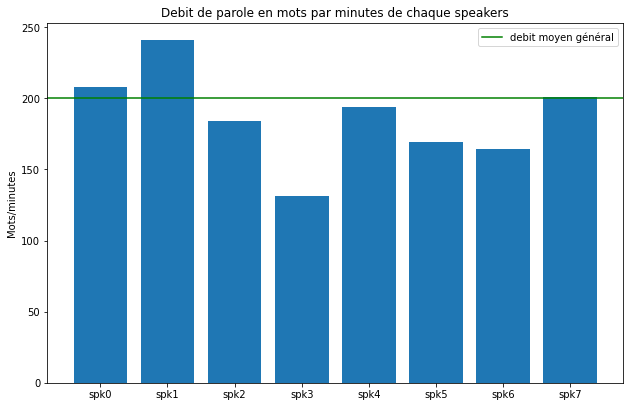

In [18]:
fig = plt.figure(figsize=(nbSpk, 5))
ax = fig.add_axes([0,0,1,1])
ax.bar(spk, tabDebit)
plt.axhline(y=200, color = "green", label ="debit moyen général")
plt.legend()
plt.title("Debit de parole en mots par minutes de chaque speakers")
ax.set_ylabel("Mots/minutes")
plt.show()


In [20]:
###Partie NLP word embbeding
print("tout les mots :\n", npWord)

tout les mots :
 ["c'" 'est' 'un' 'signal' "d'" 'alarme' 'que' 'lance' 'xavier' 'plantys'
 'le' 'président' 'de' "l'" 'obliger' 'sauternes' 'et' 'copropriétaire'
 'du' 'château' 'guiraud' '<unk>' 'aller' 'vers' 'des' 'cépages'
 'hybrides' 'résistants' "c'" 'est' 'pour' 'lui' 'une' 'perte' "d'"
 'identité' 'des' 'vins' '<unk>' 'cela' 'va' 'à' "l'" 'encontre' 'des' 'a'
 'aussi' 'créé' 'par' 'les' 'vignerons' 'et' 'syndicats' 'il' 'y' 'a'
 'plus' 'de' 'quatre-vingts' 'ans' 'quand' 'les' 'gens' 'ou' 'une'
 'bouteille' 'de' 'bordeaux' 'ils' 'ont' 'derrière' 'toute' "l'"
 'histoire' '<unk>' 'a' 'haussé' "c'" 'est' 'la' 'sélection' 'des'
 'cépages' 'à' 'travers' 'les' 'âges' 'par' 'les' 'vignerons' 'de'
 'cépages' 'autochtones' 'euh' 'et' 'que' "l'" 'introduction' 'euh' 'de'
 'de' 'génétique' 'euh' "d'" 'ailleurs' 'américaine' 'et' "d'" 'hybrides'
 'euh' 'bien' 'ça' 'ne' 'peut' 'entraîner' 'que' 'une' 'un'
 'affaiblissement' 'euh' 'de' 'de' 'de' 'cette' 'filiation' 'dans' "l'"
 'entre-deux' '

In [21]:
#building raw text
def buildText(tabWord):
    text = ""
    for word in tabWord:
        if word != "<unk>":
            if word[-1] != "'":
                text += word + " "
            else:
                text += word
    return text
text = buildText(npWord)

In [22]:
#python -m spacy download fr_core_news_lg
import spacy
#loading the french model
nlp = spacy.load("fr_core_news_lg")

In [23]:
#building tokens
rawText = nlp(text)
stemTextb = ""
for token in rawText:
    print(token, token.pos_)

c' PRON
est AUX
un DET
signal NOUN
d' ADP
alarme NOUN
que PRON
lance VERB
xavier PROPN
plantys PROPN
le DET
président NOUN
de ADP
l' PRON
obliger VERB
sauternes ADJ
et CCONJ
copropriétaire NOUN
du ADP
château NOUN
guiraud VERB
aller VERB
vers ADP
des DET
cépages NOUN
hybrides ADJ
résistants NOUN
c' PRON
est AUX
pour ADP
lui PRON
une DET
perte NOUN
d' ADP
identité NOUN
des ADP
vins NOUN
cela PRON
va VERB
à ADP
l' DET
encontre NOUN
des ADP
a AUX
aussi ADV
créé VERB
par ADP
les DET
vignerons NOUN
et CCONJ
syndicats NOUN
il PRON
y PRON
a VERB
plus ADV
de ADP
quatre-vingts NUM
ans NOUN
quand SCONJ
les DET
gens NOUN
ou CCONJ
une DET
bouteille NOUN
de ADP
bordeaux PROPN
ils PRON
ont VERB
derrière ADP
toute ADJ
l' DET
histoire NOUN
a AUX
haussé VERB
c' PRON
est AUX
la DET
sélection NOUN
des ADP
cépages NOUN
à ADP
travers NOUN
les DET
âges NOUN
par ADP
les DET
vignerons NOUN
de ADP
cépages NOUN
autochtones ADJ
euh VERB
et CCONJ
que SCONJ
l' DET
introduction NOUN
euh ADJ
de ADP
de DET
génétique 

In [24]:
#remove stop_list + stemming (core word)
stemTextb = nlp(buildText([str(token.lemma_) for token in rawText if not(token.is_stop or token.is_punct or token.pos_ == "DET" or token.pos_ == "PUNCT")]))
stemText = nlp(buildText([str(token.lemma_) for token in stemTextb if not(token.is_stop or token.is_punct or token.pos_ == "DET" or token.pos_ == "PUNCT")]))
for token in stemText:
    print(token, token.pos_)


signal NOUN
alarm X
lancer VERB
xavier PROPN
plantys PROPN
président ADJ
obliger VERB
sauterne NOUN
copropriétaire NOUN
château NOUN
guiraud VERB
aller VERB
cépage NOUN
hybride ADJ
résistant ADJ
perte NOUN
identité NOUN
vin NOUN
encontre NOUN
créer VERB
vigneron NOUN
syndicat VERB
quatre-vingts NUM
an NOUN
bouteille NOUN
bordeaux ADJ
histoire NOUN
hausser VERB
sélection NOUN
cépage NOUN
travers NOUN
âge NOUN
vigneron ADJ
cépage NOUN
autochtone ADJ
euh CCONJ
introduction NOUN
euh ADJ
génétique ADJ
euh ADJ
ailleurs ADV
américain ADJ
hybride ADJ
euh ADJ
bien ADV
entraîner VERB
affaiblissement NOUN
euh CCONJ
filiation NOUN
entre-deux ADJ
mer ADJ
vignobl VERB
coup NOUN
expériment ADV
hectare ADJ
cépage VERB
résistant ADJ
maladie NOUN
hectar NOUN
vigne ADJ
choix ADV
hybride ADJ
réduire VERB
traitement NOUN
hauteur NOUN
euh ADV
vignoble VERB
maximum ADJ
vigneron ADJ
assemblage NOUN
final ADJ
vin NOUN
euh ADJ
euh CCONJ
dénaturer VERB
bordeaux NOUN
euh ADJ
garder VERB
quatre-vingt-dix NUM
varié

In [26]:
#each token has a vector of word embedding
word_emb = [word.vector for word in stemText]

In [27]:
from sklearn.manifold import TSNE

In [28]:
#dictionary to help representing groups of words
dictcolor = {"NOUN": "royalblue",
             "ADJ" : "red",
             "ADV" : "green",
             "VERB": "pink",
             "PROPN":"lightcyan",
             "NUM": "tan",
             "ADP":"maroon",
             "AUX": "pink",
             "CCONJ": "black",
             "PRON": "yellow",
             "X" :"cyan",
             "PUNCT":"blue"}


C:\Users\danyn\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\danyn\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


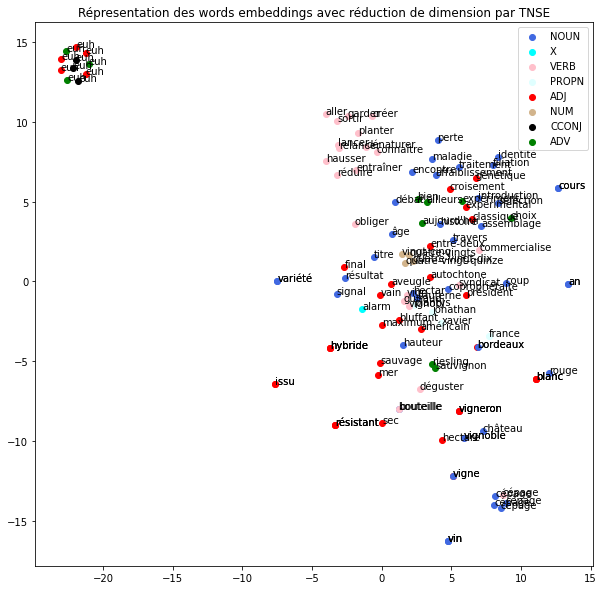

In [29]:
#representation des words embeddings in 2 components
#Must play with perplexity for more accurate representation
tsne2d = TSNE(n_components = 2, perplexity = 15, random_state = 0)
tsne_word_emb2d = tsne2d.fit_transform(word_emb)
x = tsne_word_emb2d[:,0]
y = tsne_word_emb2d[:,1]

plt.figure(figsize=(dimy, dimy))
for i, token in enumerate(stemText):
    plt.scatter(x[i], y[i], c = dictcolor[token.pos_], label = token.pos_)
    plt.text(x[i], (y[i]), str(token))
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())    
plt.title("Répresentation des words embeddings avec réduction de dimension par TNSE")
plt.show()

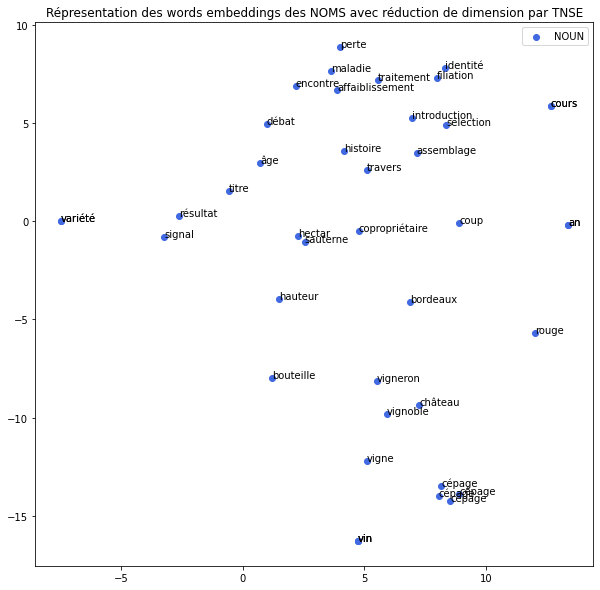

In [59]:
#représentation des words embeddings 2d (nom token)
plt.figure(figsize=(dimy, dimy))
for i, token in enumerate(stemText):
    if token.pos_ == "NOUN":
        plt.scatter(x[i], y[i], c = dictcolor[token.pos_], label = token.pos_)
        plt.text(x[i], (y[i]), str(token))

handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())    
plt.title("Répresentation des words embeddings des NOMS avec réduction de dimension par TNSE")
plt.show()

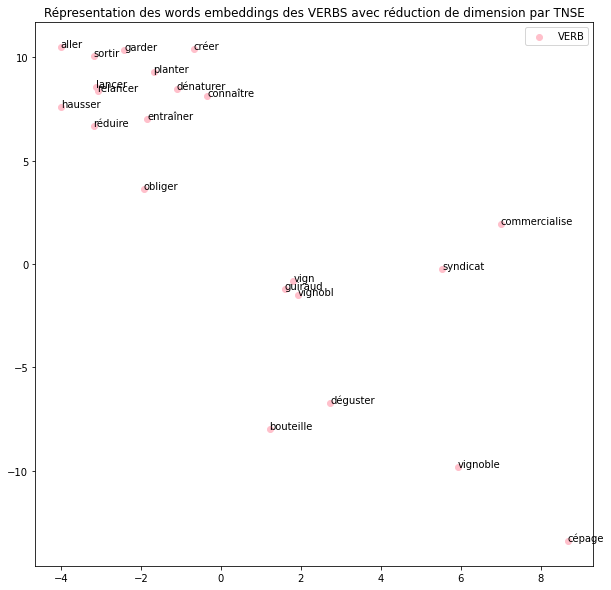

In [30]:
#représentation des words embeddings 2d (verbe token)
plt.figure(figsize=(dimy, dimy))
for i, token in enumerate(stemText):
    if token.pos_ == "VERB":
        plt.scatter(x[i], y[i], c = dictcolor[token.pos_], label = token.pos_)
        plt.text(x[i], (y[i]), str(token))

handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())    
plt.title("Répresentation des words embeddings des VERBS avec réduction de dimension par TNSE")
plt.show()

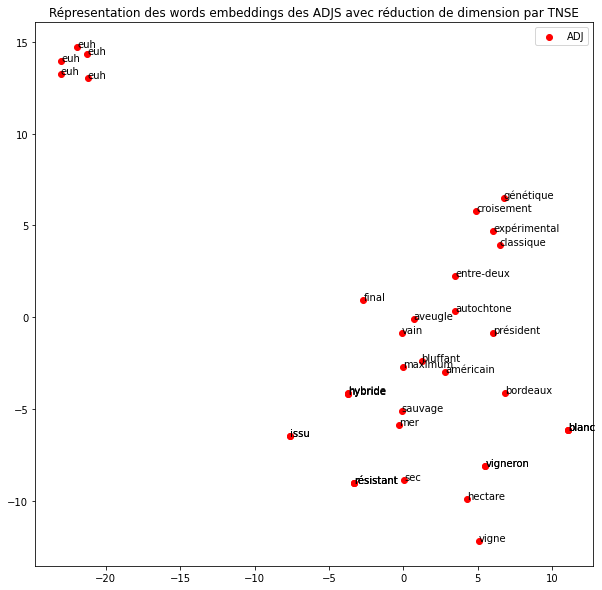

In [31]:
#représentation des words embeddings 2d (adj token)
plt.figure(figsize=(dimy, dimy))
for i, token in enumerate(stemText):
    if token.pos_ == "ADJ":
        plt.scatter(x[i], y[i], c = dictcolor[token.pos_], label = token.pos_)
        plt.text(x[i], (y[i]), str(token))

handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())    
plt.title("Répresentation des words embeddings des ADJS avec réduction de dimension par TNSE")
plt.show()

C:\Users\danyn\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\danyn\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


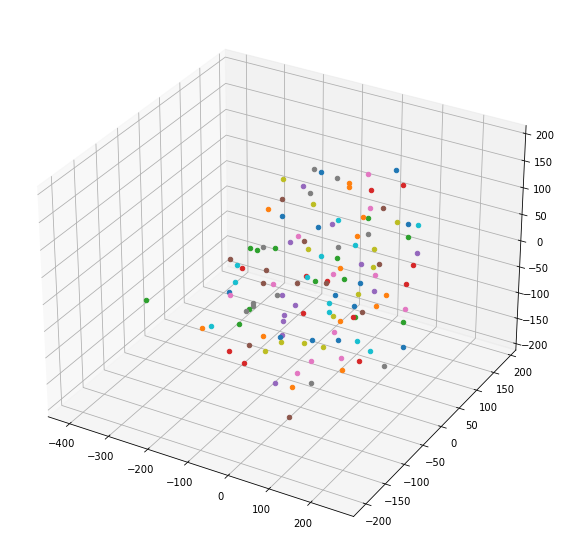

In [33]:
tsne3d = TSNE(n_components = 3, perplexity = 15, random_state = 0)
tsne_word_emb3d = tsne3d.fit_transform(word_emb)

fig = plt.figure(figsize = (dimx, dimy))
ax = fig.add_subplot(projection='3d')

for x, y, z in tsne_word_emb3d:
    ax.scatter(x, y, z)
plt.show()